In [1]:
import pandas as pd
import numpy as np

### 1. Data Preparation and Feature Engineering

In [2]:
# Generate sample dataset (in real scenario, you'd load from CSV/database)
def generate_sample_data(n_samples=10000):
    np.random.seed(42)
    
    data = {
        'age': np.random.randint(22, 65, n_samples),
        'income': np.random.normal(60000, 25000, n_samples),
        'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples, p=[0.2, 0.5, 0.2, 0.1]),
        'employment_years': np.random.exponential(5, n_samples),
        'credit_score': np.random.randint(300, 850, n_samples),
        'debt_to_income': np.random.uniform(0.1, 0.8, n_samples),
        'existing_loans': np.random.randint(0, 5, n_samples),
        'savings_balance': np.random.exponential(20000, n_samples),
        'mortgage_balance': np.random.exponential(150000, n_samples),
        'loan_amount_requested': np.random.uniform(5000, 50000, n_samples)
    }
    
    df = pd.DataFrame(data)
    
    # Ensure positive values
    df['income'] = np.abs(df['income'])
    df['employment_years'] = np.abs(df['employment_years'])
    df['savings_balance'] = np.abs(df['savings_balance'])
    
    # Create target variable based on business rules
    conditions = (
        (df['income'] > 50000) &
        (df['credit_score'] > 650) &
        (df['debt_to_income'] < 0.5) &
        (df['existing_loans'] < 3) &
        (df['loan_amount_requested'] < df['income'] * 0.5)
    )
    
    df['loan_approved'] = conditions.astype(int)
    
    # Add some noise to make it more realistic
    noise_mask = np.random.random(n_samples) < 0.1
    df.loc[noise_mask, 'loan_approved'] = 1 - df.loc[noise_mask, 'loan_approved']
    
    return df

## Comprendre la structure des données

In [4]:
# Generate dataset
df = generate_sample_data(10000)

In [5]:
df.shape

(10000, 11)

In [6]:
df.head()

,age,income,education,employment_years,credit_score,debt_to_income,existing_loans,savings_balance,mortgage_balance,loan_amount_requested,loan_approved
0,60,112289.409244,Bachelor,9.050311,531,0.390754,0,6145.336291,72188.693736,44976.720471,0
1,50,59115.248046,Master,1.481161,727,0.646571,3,20403.834566,211585.095770,11626.643582,0
2,36,10254.612030,High School,0.396043,541,0.338728,0,22092.026152,163944.255264,23481.989213,1
3,64,43128.037589,Bachelor,0.161239,433,0.667444,2,23310.774960,25379.760954,26878.303660,0
4,29,55406.668131,PhD,4.659160,370,0.175559,4,35748.352724,9677.911563,45716.540345,0


In [8]:
# Récupérer des informations résumées sur le DataFrame à l'aide de la méthode info().
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    10000 non-null  int32  
 1   income                 10000 non-null  float64
 2   education              10000 non-null  object 
 3   employment_years       10000 non-null  float64
 4   credit_score           10000 non-null  int32  
 5   debt_to_income         10000 non-null  float64
 6   existing_loans         10000 non-null  int32  
 7   savings_balance        10000 non-null  float64
 8   mortgage_balance       10000 non-null  float64
 9   loan_amount_requested  10000 non-null  float64
 10  loan_approved          10000 non-null  int64  
dtypes: float64(6), int32(3), int64(1), object(1)
memory usage: 742.3+ KB


In [9]:
# Déterminer s'il y a des données manquantes.
missing_values = df.isnull().sum()

# Vérifier les valeurs nulles et NaN dans l'ensemble de données.
print('Null values ' + str(df.isnull().sum()) + '\n')
print('NaN values ' + str(df.isna().sum()) + '\n')

# Afficher s'il y a des points de données manquants dans l'ensemble de données.
if missing_values.sum() > 0:
    print('There are missing data points in the Personal Loan dataset.')
else:
    print('There are no missing data points in the Personal Load dataset.')

Null values age                      0
income                   0
education                0
employment_years         0
credit_score             0
debt_to_income           0
existing_loans           0
savings_balance          0
mortgage_balance         0
loan_amount_requested    0
loan_approved            0
dtype: int64

NaN values age                      0
income                   0
education                0
employment_years         0
credit_score             0
debt_to_income           0
existing_loans           0
savings_balance          0
mortgage_balance         0
loan_amount_requested    0
loan_approved            0
dtype: int64

There are no missing data points in the Personal Load dataset.


In [11]:
# L'utilisation de la fonction describe() avec (include-“all”).T peut rendre les données plus lisibles.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,10000.0,NaN,NaN,NaN,43.002,12.2858,22.0,33.0,43.0,54.0,64.0
income,10000.0,NaN,NaN,NaN,60095.665713,24919.785948,80.994775,42659.807266,60158.239327,77319.655905,154437.249403
education,10000,4,Bachelor,5092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_years,10000.0,NaN,NaN,NaN,4.987626,4.965739,0.000028,1.418683,3.470698,6.893164,42.327081
credit_score,10000.0,NaN,NaN,NaN,573.2137,157.375997,300.0,438.0,575.0,707.0,849.0
debt_to_income,10000.0,NaN,NaN,NaN,0.452249,0.201383,0.100006,0.280193,0.455399,0.626142,0.799958
existing_loans,10000.0,NaN,NaN,NaN,1.9989,1.415733,0.0,1.0,2.0,3.0,4.0
savings_balance,10000.0,NaN,NaN,NaN,19922.562877,19542.115585,2.600394,5834.275623,14018.472233,27832.526272,179759.805314
mortgage_balance,10000.0,NaN,NaN,NaN,151113.650071,149793.898299,27.047853,43198.917081,105889.841274,212633.343989,1339000.516146
loan_amount_requested,10000.0,NaN,NaN,NaN,27298.520649,13028.238166,5004.541218,15790.887759,27481.894402,38493.355252,49999.641904


In [14]:
# Calculez la répartition des prêts hypothécaires.
mortgage_distribution = df['mortgage_balance'].value_counts()

# Trier la distribution par ordre décroissant.
mortgage_distribution_sorted = mortgage_distribution.sort_values(ascending=False)

# Formatez les valeurs hypothécaires en dollars.
mortgage_distribution_sorted.index = mortgage_distribution_sorted.index.map(lambda x: f'${x:,.0f}K')

# Imprimer la répartition des prêts hypothécaires.
print('Distribution des prêts hypothécaires (ordre décroissant) :')
print(mortgage_distribution_sorted)

Distribution des prêts hypothécaires (ordre décroissant) :
mortgage_balance
$72,189K     1
$211,585K    1
$163,944K    1
$25,380K     1
$9,678K      1
            ..
$72,755K     1
$119,530K    1
$18,363K     1
$116,093K    1
$203,219K    1
Name: count, Length: 10000, dtype: int64


### 2. Feature Engineering and Preprocessing

In [15]:
from sklearn.calibration import LabelEncoder


def preprocess_data(df):
    # Create copy of dataframe
    df_processed = df.copy()
    
    # Create new features
    df_processed['loan_to_income_ratio'] = df_processed['loan_amount_requested'] / df_processed['income']
    df_processed['savings_to_loan_ratio'] = df_processed['savings_balance'] / df_processed['loan_amount_requested']
    df_processed['age_group'] = pd.cut(df_processed['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60+'])
    
    # Handle categorical variables
    le_education = LabelEncoder()
    le_age = LabelEncoder()
    
    df_processed['education_encoded'] = le_education.fit_transform(df_processed['education'])
    df_processed['age_group_encoded'] = le_age.fit_transform(df_processed['age_group'])
    
    # Select features for model
    features = [
        'income', 'education_encoded', 'employment_years', 'credit_score',
        'debt_to_income', 'existing_loans', 'savings_balance', 'mortgage_balance',
        'loan_amount_requested', 'loan_to_income_ratio', 'savings_to_loan_ratio', 'age_group_encoded'
    ]
    
    X = df_processed[features]
    y = df_processed['loan_approved']
    
    return X, y, df_processed

# Preprocess data
X, y, df_processed = preprocess_data(df)

print("Feature names:", X.columns.tolist())
print("\nTarget distribution:")
print(y.value_counts())
print("\nPercentage approved:", f"{y.mean()*100:.2f}%")

Feature names: ['income', 'education_encoded', 'employment_years', 'credit_score', 'debt_to_income', 'existing_loans', 'savings_balance', 'mortgage_balance', 'loan_amount_requested', 'loan_to_income_ratio', 'savings_to_loan_ratio', 'age_group_encoded']

Target distribution:
loan_approved
0    8560
1    1440
Name: count, dtype: int64

Percentage approved: 14.40%


### 3. Train-Test Split and Scaling

In [16]:
# Split the data
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 8000
Test set size: 2000


### 4. Model Training and Evaluation


Random Forest Results:
Accuracy: 0.9035

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1712
           1       0.91      0.36      0.52       288

    accuracy                           0.90      2000
   macro avg       0.91      0.68      0.73      2000
weighted avg       0.90      0.90      0.89      2000


Logistic Regression Results:
Accuracy: 0.8565

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1712
           1       1.00      0.00      0.01       288

    accuracy                           0.86      2000
   macro avg       0.93      0.50      0.46      2000
weighted avg       0.88      0.86      0.79      2000


SVM Results:
Accuracy: 0.8660

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1712
           1       0.86      0.08      0.15   

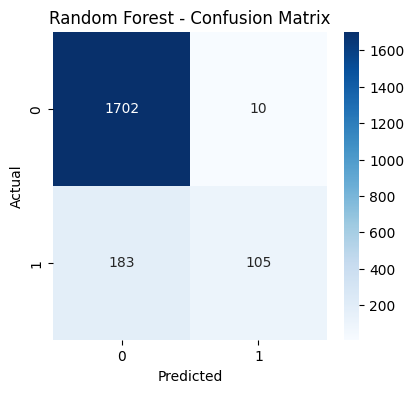

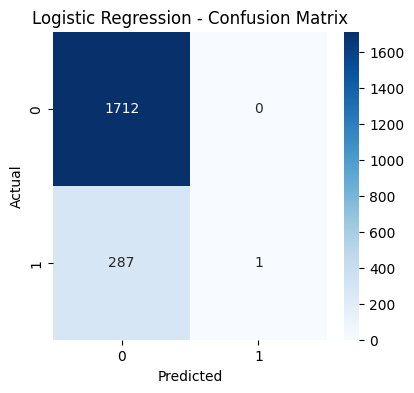

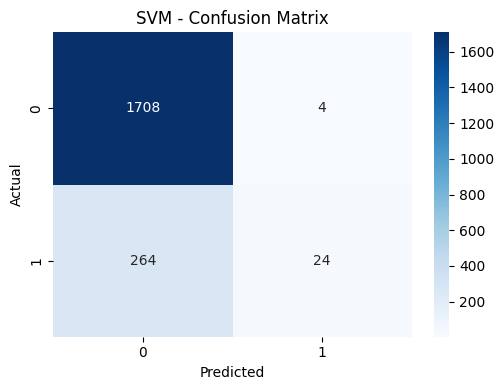

In [18]:
from matplotlib import pyplot as plt
import seaborn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC


def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        if name == 'Logistic Regression' or name == 'SVM':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        accuracy = accuracy_score(y_test, y_pred)
        
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }
        
        print(f"\n{name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        # Plot confusion matrix
        plt.figure(figsize=(15, 4))
        plt.subplot(1, 3, list(models.keys()).index(name) + 1)
        cm = confusion_matrix(y_test, y_pred)
        seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} - Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
    
    plt.tight_layout()
    plt.show()
    
    return results

# Train and evaluate models
results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

### 5. Feature Importance Analysis

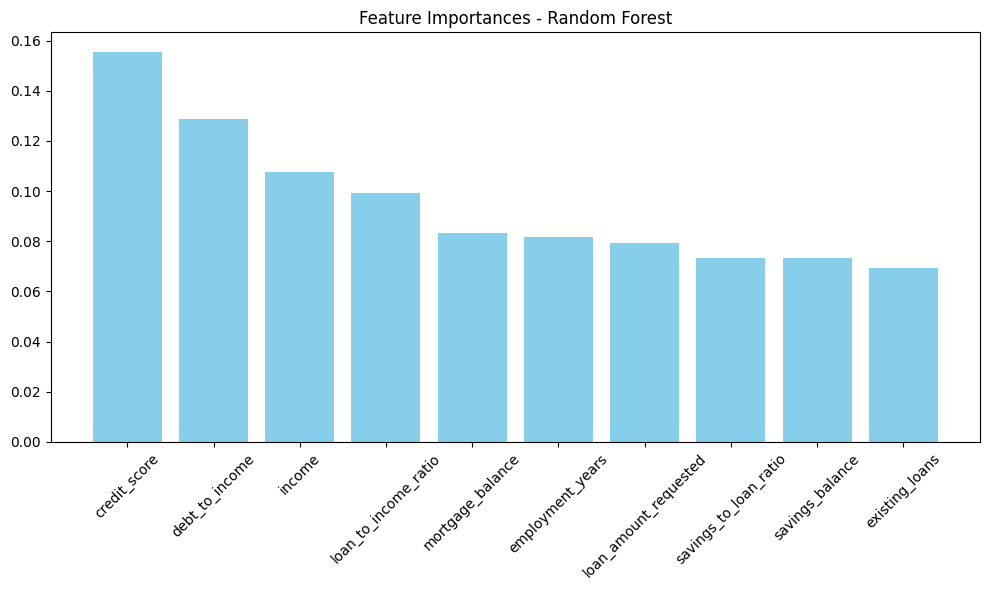


Top Feature Importances:
1. credit_score: 0.1555
2. debt_to_income: 0.1288
3. income: 0.1075
4. loan_to_income_ratio: 0.0993
5. mortgage_balance: 0.0833
6. employment_years: 0.0815
7. loan_amount_requested: 0.0793
8. savings_to_loan_ratio: 0.0734
9. savings_balance: 0.0734
10. existing_loans: 0.0691


In [19]:
def plot_feature_importance(model, feature_names, top_n=10):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(10, 6))
        plt.title("Feature Importances - Random Forest")
        plt.bar(range(min(top_n, len(indices))), 
                importances[indices[:top_n]], 
                color='skyblue', 
                align="center")
        plt.xticks(range(min(top_n, len(indices))), 
                  [feature_names[i] for i in indices[:top_n]], 
                  rotation=45)
        plt.tight_layout()
        plt.show()
        
        print("\nTop Feature Importances:")
        for i in range(min(top_n, len(indices))):
            print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot feature importance for Random Forest
rf_model = results['Random Forest']['model']
plot_feature_importance(rf_model, X.columns.tolist())

### 6. Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV


def tune_random_forest(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='accuracy'
    )
    
    grid_search.fit(X_train, y_train)
    
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))
    
    return grid_search.best_estimator_

# Tune Random Forest (optional - can be time consuming)
# best_rf = tune_random_forest(X_train, y_train)

### 7. Final Model and Prediction Function

In [22]:
class LoanEligibilityPredictor:
    def __init__(self):
        self.model = None
        self.scaler = None
        self.feature_names = None
        self.label_encoders = {}
    
    def fit(self, X, y):
        """Train the model"""
        self.feature_names = X.columns.tolist()
        
        # Scale features
        self.scaler = StandardScaler()
        X_scaled = self.scaler.fit_transform(X)
        
        # Train Random Forest
        self.model = RandomForestClassifier(
            n_estimators=200,
            max_depth=20,
            min_samples_split=2,
            min_samples_leaf=1,
            random_state=42
        )
        self.model.fit(X_scaled, y)
        
        return self
    
    def predict_eligibility(self, customer_data):
        """Predict loan eligibility for a single customer"""
        if self.model is None:
            raise ValueError("Model not trained yet. Call fit() first.")
        
        # Convert to DataFrame
        customer_df = pd.DataFrame([customer_data])
        
        # Create engineered features
        customer_df['loan_to_income_ratio'] = customer_df['loan_amount_requested'] / customer_df['income']
        customer_df['savings_to_loan_ratio'] = customer_df['savings_balance'] / customer_df['loan_amount_requested']
        
        # Ensure all features are present
        for feature in self.feature_names:
            if feature not in customer_df.columns:
                customer_df[feature] = 0
        
        # Reorder columns to match training data
        customer_df = customer_df[self.feature_names]
        
        # Scale features
        customer_scaled = self.scaler.transform(customer_df)
        
        # Make prediction
        prediction = self.model.predict(customer_scaled)[0]
        probability = self.model.predict_proba(customer_scaled)[0][1]
        
        return {
            'eligible': bool(prediction),
            'probability': float(probability),
            'confidence': 'High' if probability > 0.8 or probability < 0.2 else 'Medium'
        }

# Train final model
predictor = LoanEligibilityPredictor()
predictor.fit(X, y)

### 8. Example Usage and Testing

In [23]:
# Test with example customers
test_customers = [
    {
        'income': 75000,
        'education_encoded': 2,  # Master's degree
        'employment_years': 8,
        'credit_score': 720,
        'debt_to_income': 0.3,
        'existing_loans': 1,
        'savings_balance': 25000,
        'mortgage_balance': 180000,
        'loan_amount_requested': 20000,
        'loan_to_income_ratio': 20000/75000,
        'savings_to_loan_ratio': 25000/20000,
        'age_group_encoded': 2
    },
    {
        'income': 35000,
        'education_encoded': 0,  # High School
        'employment_years': 2,
        'credit_score': 580,
        'debt_to_income': 0.7,
        'existing_loans': 4,
        'savings_balance': 2000,
        'mortgage_balance': 0,
        'loan_amount_requested': 25000,
        'loan_to_income_ratio': 25000/35000,
        'savings_to_loan_ratio': 2000/25000,
        'age_group_encoded': 1
    }
]

print("Loan Eligibility Predictions:")
print("=" * 50)

for i, customer in enumerate(test_customers, 1):
    result = predictor.predict_eligibility(customer)
    print(f"\nCustomer {i}:")
    print(f"Eligible: {result['eligible']}")
    print(f"Probability: {result['probability']:.3f}")
    print(f"Confidence: {result['confidence']}")
    print("-" * 30)

Loan Eligibility Predictions:

Customer 1:
Eligible: True
Probability: 0.840
Confidence: High
------------------------------

Customer 2:
Eligible: False
Probability: 0.274
Confidence: Medium
------------------------------


### 9. Model Deployment Ready Code

In [ ]:
import joblib

def save_model(predictor, filepath):
    """Save the trained model for later use"""
    model_data = {
        'model': predictor.model,
        'scaler': predictor.scaler,
        'feature_names': predictor.feature_names
    }
    joblib.dump(model_data, filepath)
    print(f"Model saved to {filepath}")

def load_model(filepath):
    """Load a saved model"""
    model_data = joblib.load(filepath)
    predictor = LoanEligibilityPredictor()
    predictor.model = model_data['model']
    predictor.scaler = model_data['scaler']
    predictor.feature_names = model_data['feature_names']
    return predictor

# Save the model
save_model(predictor, 'loan_eligibility_model.pkl')

# Load the model (for later use)
# loaded_predictor = load_model('loan_eligibility_model.pkl')